<a href="https://colab.research.google.com/github/saswata121924/LEGO-Dataset-Analysis/blob/main/LEGO_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence.
<img src="https://i.imgur.com/49FNOHj.jpg">

In [3]:
import pandas as pd
colors_data = pd.read_csv("data/colors.csv")
colors_data.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [4]:
print(f"Transparent Colors: {colors_data['name'][colors_data['is_trans']=='t'].count()}")
print(f"Non-Transparent Colors: {colors_data['name'][colors_data['is_trans']=='f'].count()}")

Transparent Colors: 28
Non-Transparent Colors: 107


In [5]:
colors_data['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64

## **Understanding LEGO Themes vs LEGO Sets**
Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.
<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.
<img src="https://i.imgur.com/whB1olq.png">

In [6]:
sets_data = pd.read_csv("data/sets.csv")
sets_data.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [7]:
sets_in_first_year_of_operation = sets_data.loc[sets_data["year"] == sets_data['year'].min()][["name", "year"]]
print(sets_in_first_year_of_operation)

                                   name  year
9521         Extra-Large Gift Set (ABB)  1949
9534               Large Gift Set (ABB)  1949
9539              Medium Gift Set (ABB)  1949
9544              Small Brick Set (ABB)  1949
9545  Small Doors and Windows Set (ABB)  1949


In [8]:
print(f"Number of Distinct LEGO sets created in the 1st year of operation: {sets_in_first_year_of_operation.name.count()}")

Number of Distinct LEGO sets created in the 1st year of operation: 5


In [9]:
sets_with_most_number_of_parts = sets_data.sort_values(by="num_parts", ascending=False).head()
sets_with_most_number_of_parts[["name", "year", "num_parts"]]

,name,year,num_parts
15004,The Ultimate Battle for Chima,2015,9987
11183,UCS Millennium Falcon,2017,7541
10551,Hogwarts Castle,2018,6020
295,Taj Mahal,2017,5923
221,Taj Mahal,2008,5922


In [15]:
import matplotlib.pyplot as plt
sets_data.groupby('year')['set_num'].count()

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

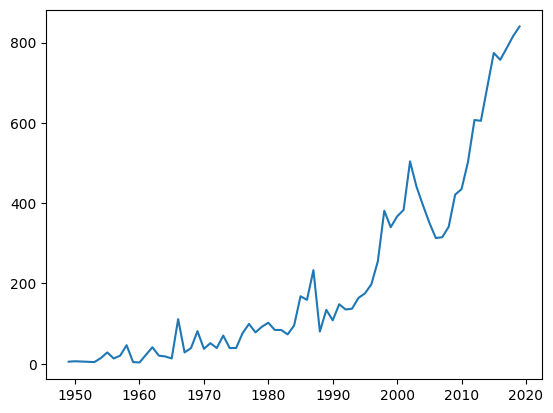

In [19]:
year_wise_data = sets_data.groupby('year')['set_num'].count()
plt.plot(year_wise_data[:-2])

In [20]:
sets_data.groupby('year').agg({'theme_id': pd.Series.nunique})

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


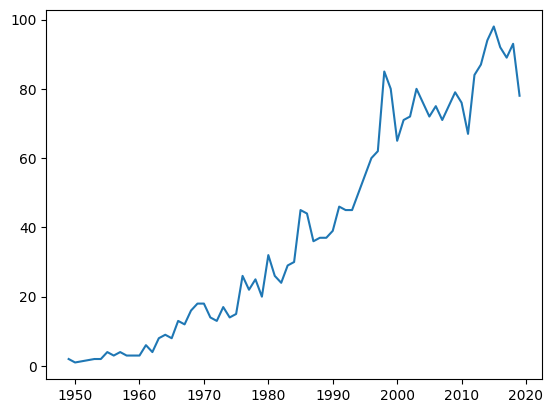

In [26]:
themes_by_year = sets_data.groupby('year').agg({'theme_id': pd.Series.nunique})['theme_id']
plt.plot(themes_by_year[:-2])

Text(0, 0.5, 'Unique Themes per year')

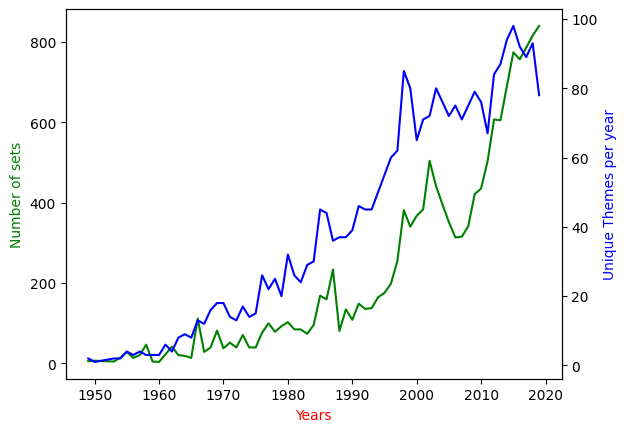

In [35]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(year_wise_data[:-2], color='g')
ax2.plot(themes_by_year[:-2], color='b')
ax1.set_xlabel("Years", color="red")
ax1.set_ylabel("Number of sets", color='green')
ax2.set_ylabel("Unique Themes per year", color='blue')

In [40]:
average_number_of_parts_per_year = sets_data.groupby('year').agg({'num_parts': pd.Series.mean})
average_number_of_parts_per_year.rename(columns={'num_parts':'average_num_parts'}, inplace=True)
average_number_of_parts_per_year.head()

,average_num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


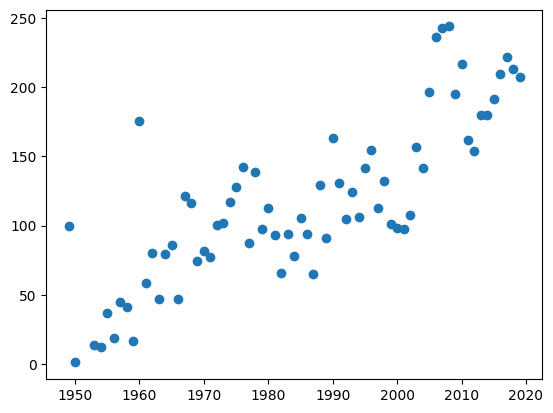

In [42]:
plt.scatter(average_number_of_parts_per_year.index[:-2], average_number_of_parts_per_year['average_num_parts'][:-2])

In [45]:
sets_data["theme_id"].value_counts()[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

<img src="https://i.imgur.com/Sg4lcjx.png">

In [46]:
themes_data = pd.read_csv("data/themes.csv")
themes_data.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [66]:
sets_per_theme = sets_data["theme_id"].value_counts()
sets_per_theme = pd.DataFrame({'id': sets_per_theme.index, 'set_counts': sets_per_theme})
sets_per_theme = pd.merge(sets_per_theme, themes_data[["id", "name"]], on="id")
sets_per_theme.head()

,id,set_counts,name
0,158,753,Star Wars
1,501,656,Gear
2,494,398,Friends
3,435,356,Ninjago
4,503,329,Key Chain


<BarContainer object of 10 artists>

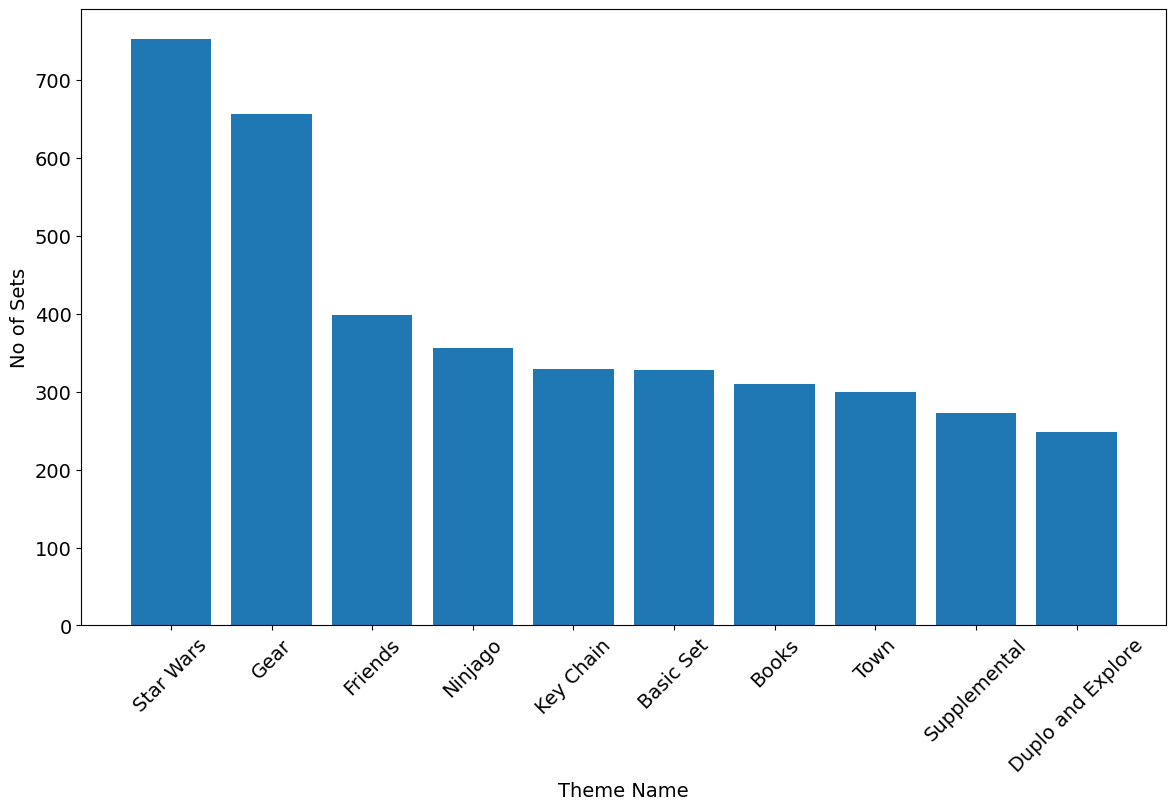

In [69]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel("Theme Name", fontsize=14)
plt.ylabel("No of Sets", fontsize=14)
plt.bar(sets_per_theme["name"][:10], sets_per_theme["set_counts"][:10])